# Predicting Heart Disease Using Machine Learning #
<i> Author: Roshan Lodha </i>

## Table of Contents ##
0. <a href='#zero'>Introduction</a><br>
1. <a href='#one'>Data Overview</a><br>
2. <a href='#two'>Data Engineering and Feature Selection</a><br>
3. <a href='#three'>Modeling</a><br>
    a. <a href='#3a'>Linear Regression</a><br>
    b. <a href='#3b'>Random Forest</a><br>
    c. <a href='#3c'>Neural Network</a><br>
4. <a href='#four'>Conclusion</a>

### <a id='zero'> Section 0: Introduction </a> ###

In [1]:
#ignore irrelavant warnings
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### <a id='one'> Section 1: The Data </a> ###
<i> source: <a href="https://www.kaggle.com/johnsmith88/heart-disease-dataset">David Lapp via Kaggle</a></i>

<b>The dataset:</b> The dataset is a relatively small one at just over 1000 entries, and contains various measurements for both healthy patients and those with heart complications including markers for age, sex, chest-pain, blood-pressure, resting blood pressure, etc. A more granular description of variables can be found <a href="https://www.kaggle.com/johnsmith88/heart-disease-dataset">here</a>.<br>
<b>Our goal:</b> Using the limited data, we hope to both predict whether or not a certain patient will have heart disease and simultaneously determine which features (measurements) are most indicative of heart complications.

<font color='red'><i>Note: This model should NOT be used as a predictive tool in any capacity for limitations discussed in the conclusion.</i></font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

heart = pd.read_csv("heart.csv")
heart.insert(0, 'bias', 1) #adds intercept term
heart.head(5)

,bias,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,1,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,1,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### <a id='two'> Section 2: Data Engineering and Feature Selection </a> ###

In [3]:
#test-train split
import sklearn.model_selection
train, test = sklearn.model_selection.train_test_split(heart, train_size=0.8, test_size=0.2)
print('Train Shape:', train.shape, '\nTest Shape:', test.shape)

Train Shape: (820, 15) 
Test Shape: (205, 15)


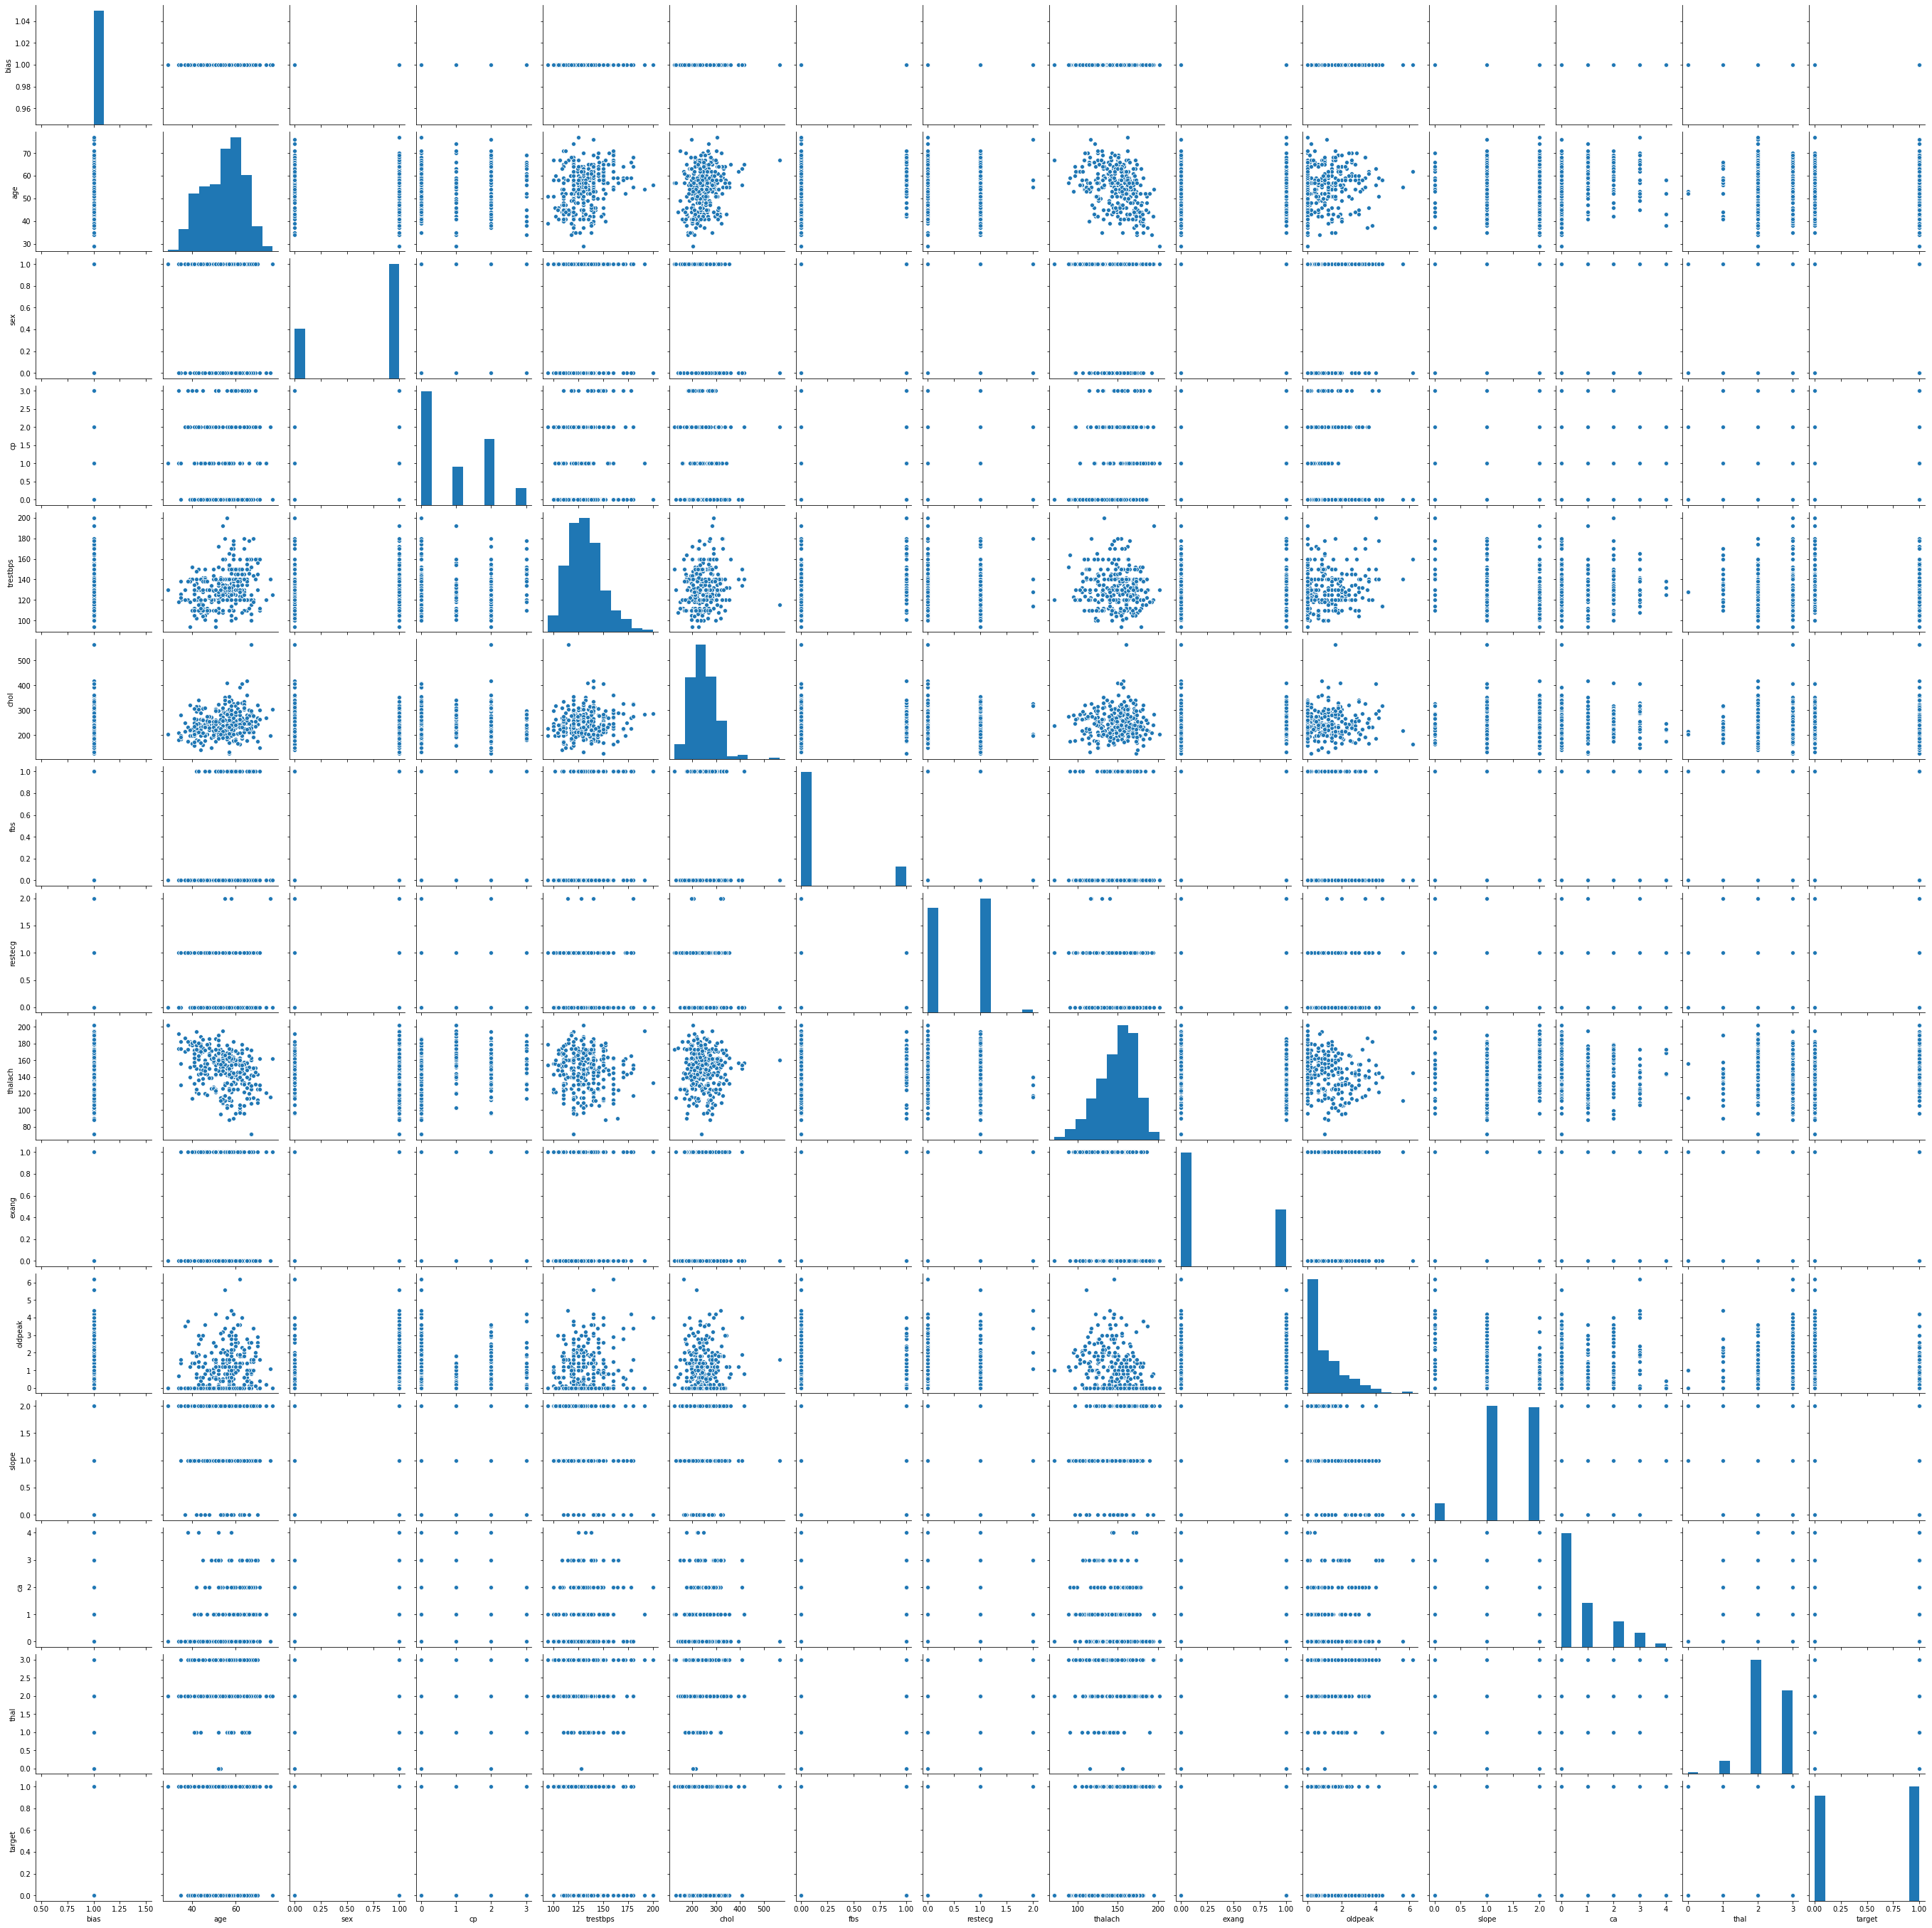

In [4]:
sns.pairplot(train)

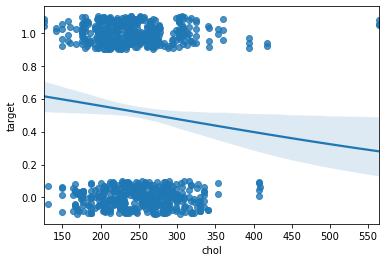

In [5]:
#cholesterol vs heart disease
sns.regplot(x='chol', y='target', data=train, logistic=True, y_jitter=0.1)

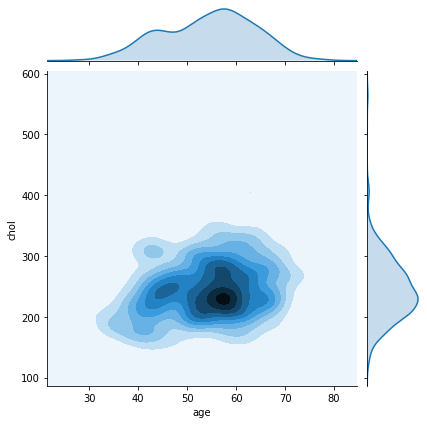

In [6]:
sns.jointplot(x='age', y='chol', data=train, kind='kde')

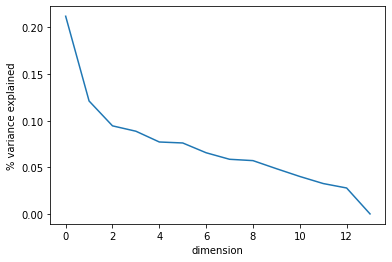

In [7]:
#standardize the data for PCA
from sklearn.preprocessing import StandardScaler

X_pca = np.matrix(StandardScaler().fit_transform(train.drop(['target'], axis=1)))
u, s, vt = np.linalg.svd(X_pca)

var = s**2/np.sum(s**2)
plt.xlabel('dimension')
plt.ylabel('% variance explained')
plt.plot(var)

### <a id='three'> Section 3: Modeling </a> ###

In [8]:
X_train = train.drop(['target'], axis=1)
y_train = train['target']
X_test = test.drop(['target'], axis=1)
y_test = test['target']

In [9]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_train[:, 0] = 1 #readd bias term

X_test = scaler.fit_transform(X_test)
X_test[:, 0] = 1 #readd bias term

X_train

array([[1.        , 0.29166667, 1.        , ..., 1.        , 0.25      ,
        0.66666667],
       [1.        , 0.64583333, 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [1.        , 0.52083333, 1.        , ..., 0.5       , 0.25      ,
        0.66666667],
       ...,
       [1.        , 0.58333333, 1.        , ..., 1.        , 0.25      ,
        0.66666667],
       [1.        , 0.66666667, 1.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [1.        , 0.375     , 1.        , ..., 0.5       , 0.25      ,
        0.66666667]])

### <a id='3a'> Section 3a: Linear Regression </a> ###

In [10]:
import sklearn.linear_model

lr = sklearn.linear_model.LogisticRegression(fit_intercept=True)

lr.fit(X_train, y_train)
train_accuracy = np.sum(lr.predict(X_train) == y_train)/len(X_train)
test_accuracy = np.sum(lr.predict(X_test) == y_test)/len(X_test)

lr_predictions = lr.predict(X_test)
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.8378
Test accuracy: 0.8976


### <a id='3b'> Section 3b: Random Forest </a> ###

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,
                            bootstrap = True,
                            max_features = 'sqrt')

rf.fit(X_train, y_train)
train_accuracy = np.sum(rf.predict(X_train) == y_train)/len(X_train)
test_accuracy = np.sum(rf.predict(X_test) == y_test)/len(X_test)

rf_predictions = rf.predict(X_test)
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 1.0000
Test accuracy: 0.9902


### <a id='3c'> Section 3c: Neural Network </a> ###

In [12]:
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.2)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((656, 14), (164, 14), (205, 14), (656,), (164,), (205,))

In [13]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([Dense(25, activation='relu', input_shape=(14,)),
                    Dense(25, activation='relu'),
                    Dense(1, activation='sigmoid'),])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                 batch_size=5, epochs=10,
                 validation_data=(X_val, y_val))

nn_predictions = model.predict_classes(X_test, verbose=1).flatten()
test_accuracy = model.evaluate(X_test, y_test)[1]

print(f"Test accuracy: {test_accuracy:.4f}")

Using TensorFlow backend.


Train on 656 samples, validate on 164 samples
Epoch 1/10
656/656 [==============================] - 0s 435us/step - loss: 0.6438 - accuracy: 0.6555 - val_loss: 0.5943 - val_accuracy: 0.7866
Epoch 2/10
656/656 [==============================] - 0s 223us/step - loss: 0.5708 - accuracy: 0.7790 - val_loss: 0.5322 - val_accuracy: 0.8110
Epoch 3/10
656/656 [==============================] - 0s 222us/step - loss: 0.5168 - accuracy: 0.7820 - val_loss: 0.5053 - val_accuracy: 0.7561
Epoch 4/10
656/656 [==============================] - 0s 222us/step - loss: 0.4745 - accuracy: 0.7790 - val_loss: 0.4639 - val_accuracy: 0.7683
Epoch 5/10
656/656 [==============================] - 0s 230us/step - loss: 0.4481 - accuracy: 0.7896 - val_loss: 0.4362 - val_accuracy: 0.7988
Epoch 6/10
656/656 [==============================] - 0s 222us/step - loss: 0.4254 - accuracy: 0.8079 - val_loss: 0.4186 - val_accuracy: 0.8049
Epoch 7/10
656/656 [==============================] - 0s 220us/step - loss: 0.4077 - accur

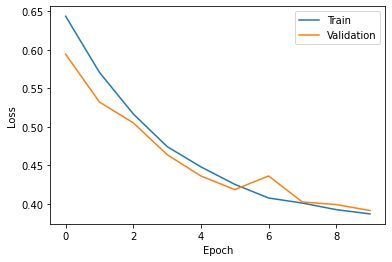

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

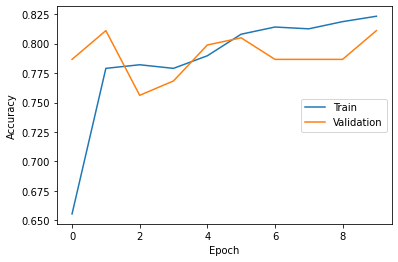

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='right')

### <a id='four'> Section 4: Conclusion </a> ###

In [16]:
agg_predictions = (lr_predictions + rf_predictions + nn_predictions) > 1.5
agg_accuracy = np.sum(agg_predictions == y_test)/len(y_test)

print(f"Aggregate accuracy: {agg_accuracy:.4f}")

Aggregate accuracy: 0.8976
